1. 전체적으로 컬럼들을 활용해서 그래프를 그리고
- 각 컬럼별 단위가 다르니까 이부분은 주의해서 컬럼을 나눠서 그려보시구요!
2. 각 팀별로 우승한 연도에 높았던 컬럼 몇개를 확인하고 (TOP 3 ~ 7)
3. 모여서 각팀별로 우승한 연도에 중요했던 컬럼에 대한 이야기를 해보면 좋겠어요!

---

# Team EDA – Best Season Key Metrics

본 노트북은 각 팀이 **성과가 가장 좋았던 시즌(우승/최고 성과 연도)**에  
어떤 지표들이 특히 높았는지(TOP 3~7)를 정리하기 위한 EDA 파일이다.

- 가설 설정 ❌
- 결론 도출 ❌
- 팀 간 비교 ❌ (다음 단계)

목적:
👉 “강팀이 잘할 때 중요했던 컬럼이 무엇인지”를 팀별로 정리한다.


## 분석 기준

### 분석 범위
- 연도: 2023–2025
- 팀: 한화, LG, KIA, SSG

### 표본 안정성 확보용 컷 기준
- 타자: PA ≥ 50
- 투수: IP ≥ 30

※ 본 파일은  
   전처리 재현이 아닌  
   **EDA 흐름과 관찰 결과 공유**를 목적으로 한다.


In [ ]:
# 기본설정
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# # 분석 대상 팀 / 연도
# teams = ['한화', 'LG', 'KIA', 'SSG']
# years = [2023, 2024, 2025]

# # 필터링
# bat_analysis = (
#     bat[bat['Team'].isin(teams)]
#     .loc[bat['Year'].isin(years)]
#     .loc[bat['PA'] >= 50]
# )

# pitch_analysis = (
#     pitch[pitch['Team'].isin(teams)]
#     .loc[pitch['Year'].isin(years)]
#     .loc[pitch['IP'] >= 30]
# )

# # 저장
# bat_analysis.to_csv(
#     '../data/processed/bat_analysis_pa50_2023_2025.csv',
#     index=False
# )

# pitch_analysis.to_csv(
#     '../data/processed/pitch_analysis_ip30_2023_2025.csv',
#     index=False
# )

In [9]:
# 데이터 불러오기
bat_analysis = pd.read_csv(
    '../data/processed/bat_analysis_pa50_2023_2025.csv'
)

pitch_analysis = pd.read_csv(
    '../data/processed/pitch_analysis_ip30_2023_2025.csv'
)

In [ ]:
# 팀 대표컬러로 지정, 전체적 톤이 비슷해서 바꿀 필요성이 있을 것도 같아 해당 형태로 작성함
ㅇ

In [74]:
# 한화 데이터 분리
hanwha_bat = bat_analysis[bat_analysis['Team'] == '한화']
hanwha_pitch = pitch_analysis[pitch_analysis['Team'] == '한화']

In [75]:
hanwha_bat.columns

Index(['Id', 'Name', 'Birthdate', 'Handedness', 'School', 'Draft', 'Year',
       'Team', 'Age', 'Pos.', 'G', 'oWAR', 'dWAR', 'PA', 'ePA', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HP', 'IB', 'SO',
       'GDP', 'SH', 'SF', 'AVG', 'OBP', 'SLG', 'OPS', 'R/ePA', 'wRC+', 'WAR'],
      dtype='object')

In [76]:
hanwha_pitch.columns

Index(['Id', 'Name', 'Birthdate', 'Handedness', 'School', 'Draft', 'Year',
       'Team', 'Age', 'Pos.', 'G', 'GS', 'GR', 'GF', 'CG', 'SHO', 'W', 'L',
       'S', 'HD', 'IP', 'ER', 'R', 'rRA', 'TBF', 'H', '2B', '3B', 'HR', 'BB',
       'HP', 'IB', 'SO', 'ROE', 'BK', 'WP', 'ERA', 'RA9', 'rRA9', 'FIP',
       'WHIP', 'WAR'],
      dtype='object')

## Hanwha Batting – Yearly Overview

- 대상: PA ≥ 50 타자
- 관점: 연도별 공격 지표 변화 방향성 확인


In [77]:
bat_cols = ['OBP', 'SLG', 'wRC+', 'WAR']

hanwha_bat_year = (
    hanwha_bat
    .groupby('Year')[bat_cols]
    .mean()
)

hanwha_bat_year


,OBP,SLG,wRC+,WAR
Year,,,,
2023,0.301350,0.316850,71.675000,0.800500
2024,0.336952,0.373619,85.457143,0.646667
2025,0.329529,0.375941,93.294118,1.262353


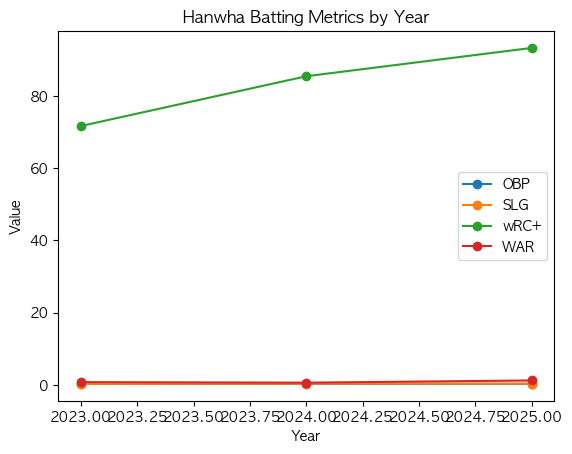

In [78]:
hanwha_bat_year.plot(
    marker='o',
    # color=TEAM_COLORS['한화']
)

plt.title('Hanwha Batting Metrics by Year')
plt.ylabel('Value')
plt.show()


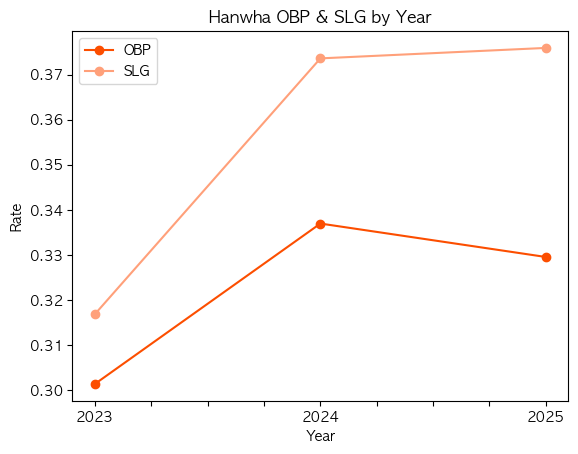

In [79]:
#obp, slg 비교
hanwha_bat_year.index = hanwha_bat_year.index.astype(str)

hanwha_bat_year[['OBP', 'SLG']].plot(
    marker='o',
    color=[TEAM_COLORS['한화'], '#FFA07A']
)

plt.title('Hanwha OBP & SLG by Year')
plt.ylabel('Rate')
plt.show()


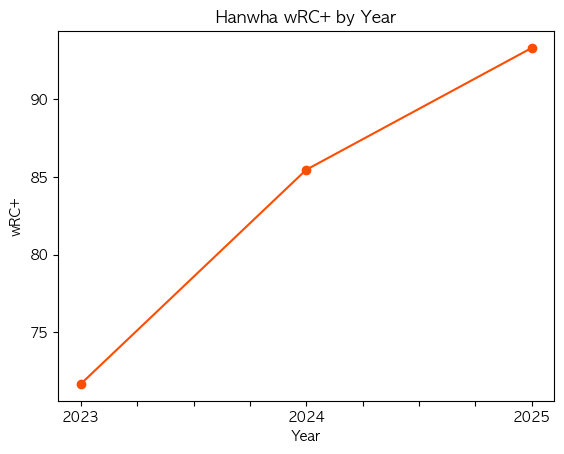

In [80]:
# wRC+ 지표 (공격 생산성 지표)
hanwha_bat_year.index = hanwha_bat_year.index.astype(str)

hanwha_bat_year['wRC+'].plot(
    marker='o',
    color=TEAM_COLORS['한화']
)

plt.title('Hanwha wRC+ by Year')
plt.ylabel('wRC+')
plt.show()


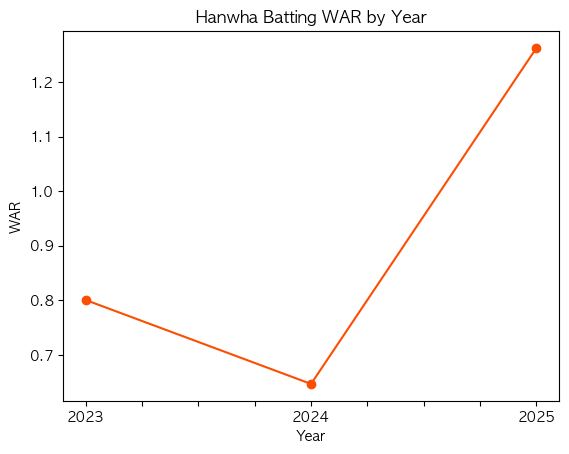

In [81]:
#WAR 지표
hanwha_bat_year.index = hanwha_bat_year.index.astype(str)

hanwha_bat_year['WAR'].plot(
    marker='o',
    color=TEAM_COLORS['한화']
)

plt.title('Hanwha Batting WAR by Year')
plt.ylabel('WAR')
plt.show()


## Hanwha Pitching – Yearly Overview

- 대상: IP ≥ 30 투수
- 관점: 실점 억제 결과(ERA)와 투구 내용(FIP) 변화 확인


In [82]:
pit_cols = ['ERA', 'FIP', 'WAR']

hanwha_pitch_year = (
    hanwha_pitch
    .groupby('Year')[pit_cols]
    .mean()
)

hanwha_pitch_year


,ERA,FIP,WAR
Year,,,
2023,4.414118,4.244118,0.811176
2024,4.976667,4.865000,1.016667
2025,3.646429,3.836429,2.212143


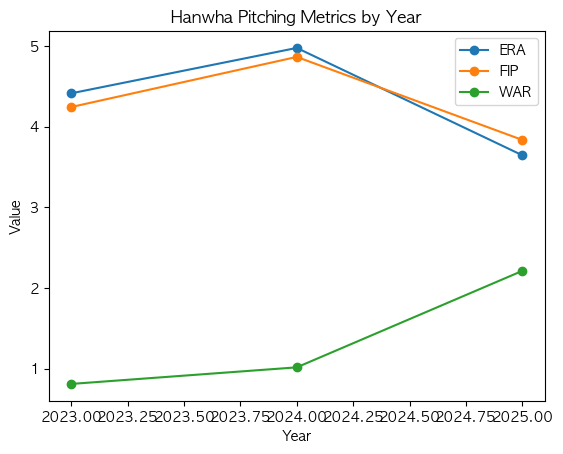

In [83]:
hanwha_pitch_year.plot(
    marker='o',
    # color=TEAM_COLORS['한화']
)

plt.title('Hanwha Pitching Metrics by Year')
plt.ylabel('Value')
plt.show()


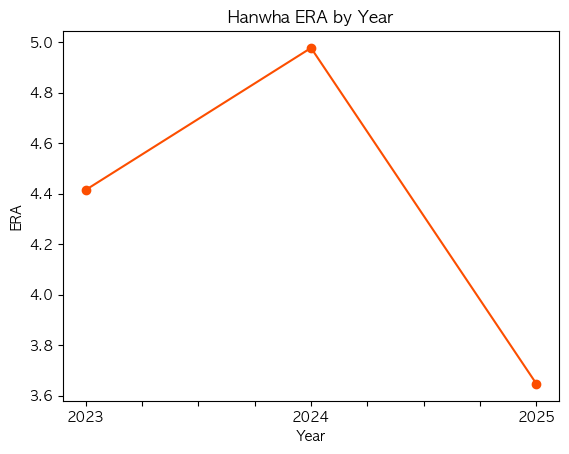

In [84]:
hanwha_pitch_year.index = hanwha_pitch_year.index.astype(str)

hanwha_pitch_year['ERA'].plot(
    marker='o',
    color=TEAM_COLORS['한화']
)

plt.title('Hanwha ERA by Year')
plt.ylabel('ERA')
plt.show()

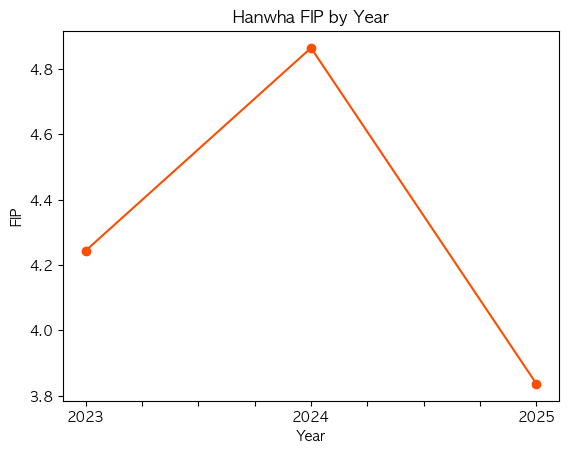

In [85]:
hanwha_pitch_year.index = hanwha_pitch_year.index.astype(str)

hanwha_pitch_year['FIP'].plot(
    marker='o',
    color=TEAM_COLORS['한화']
)

plt.title('Hanwha FIP by Year')
plt.ylabel('FIP')
plt.show()

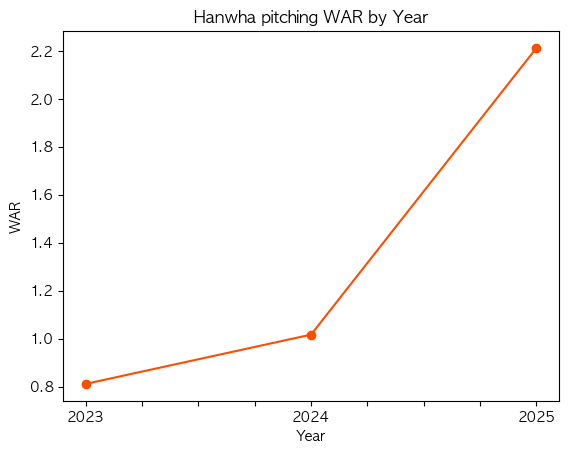

In [86]:
hanwha_pitch_year.index = hanwha_pitch_year.index.astype(str)

hanwha_pitch_year['WAR'].plot(
    marker='o',
    color=TEAM_COLORS['한화']
)

plt.title('Hanwha pitching WAR by Year')
plt.ylabel('WAR')
plt.show()

## Hanwha – Best Season Key Metrics (EDA Summary)

### 최고 성과 연도
- 2025년 (타자/투수 지표 전반이 가장 높게 관찰됨)

### 해당 연도에서 두드러진 컬럼 (TOP 3~7)
- Batting: OBP, SLG, wRC+, WAR
- Pitching: ERA, FIP, WAR

※ 본 정리는 EDA 관찰 결과이며,  
   원인 분석 및 지속 가능성 판단은 이후 단계에서 진행한다.


## 다음 단계

- 각 팀의 Best Season Key Metrics를 모아
  공통적으로 반복 등장하는 컬럼을 정리
- 이후 해당 컬럼을 중심으로
  팀 간 비교 및 가설 검증 진행 예정


---
## LG Batting – Yearly Overview

In [87]:
# LG 데이터 분리
lg_bat = bat_analysis[bat_analysis['Team'] == 'LG']
lg_pitch = pitch_analysis[pitch_analysis['Team'] == 'LG']

In [88]:
lg_bat_year = (
    lg_bat
    .groupby('Year')[bat_cols]
    .mean()
)

lg_bat_year

,OBP,SLG,wRC+,WAR
Year,,,,
2023,0.343643,0.376786,106.721429,2.548571
2024,0.346429,0.378286,93.500000,2.226429
2025,0.345062,0.393062,107.637500,2.288750


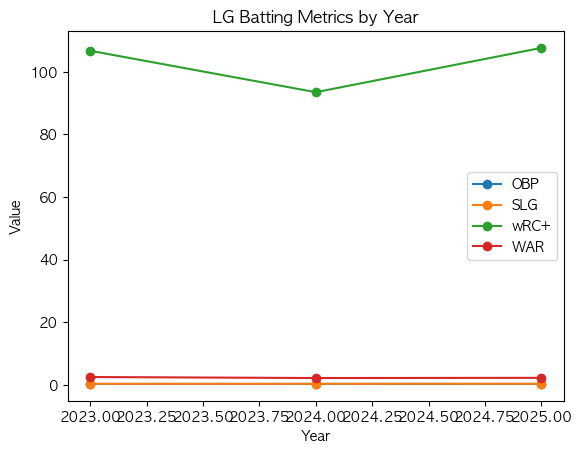

In [89]:
lg_bat_year.plot(
    marker='o',
    # color=TEAM_COLORS['한화']
)

plt.title('LG Batting Metrics by Year')
plt.ylabel('Value')
plt.show()

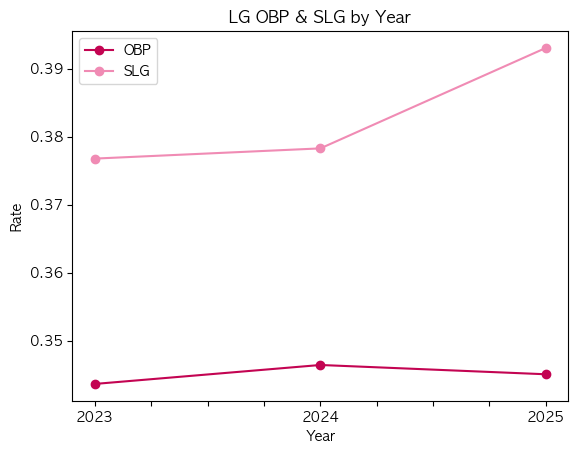

In [90]:
#obp, slg 비교
lg_bat_year.index = lg_bat_year.index.astype(str)

lg_bat_year[['OBP', 'SLG']].plot(
    marker='o',
    color=[TEAM_COLORS['LG'], '#F08BB4']
)

plt.title('LG OBP & SLG by Year')
plt.ylabel('Rate')
plt.show()

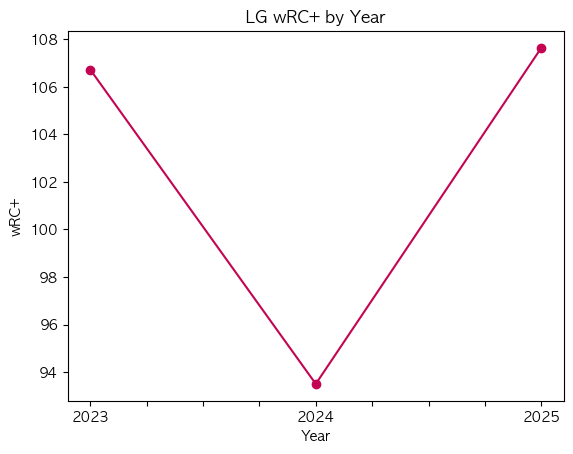

In [91]:
# wRC+ 지표 (공격 생산성 지표)
lg_bat_year.index = lg_bat_year.index.astype(str)

lg_bat_year['wRC+'].plot(
    marker='o',
    color=TEAM_COLORS['LG']
)

plt.title('LG wRC+ by Year')
plt.ylabel('wRC+')
plt.show()

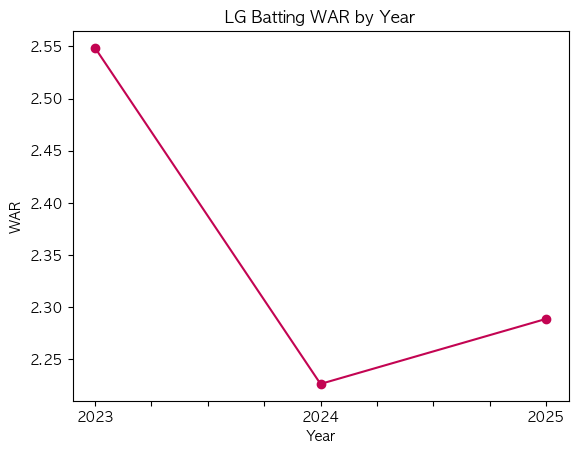

In [92]:
#WAR 지표
lg_bat_year.index = lg_bat_year.index.astype(str)

lg_bat_year['WAR'].plot(
    marker='o',
    color=TEAM_COLORS['LG']
)

plt.title('LG Batting WAR by Year')
plt.ylabel('WAR')
plt.show()


## LG Pitching – Yearly Overview

In [93]:
lg_pitch_year = (
    lg_pitch
    .groupby('Year')[pit_cols]
    .mean()
)

lg_pitch_year

,ERA,FIP,WAR
Year,,,
2023,3.605625,3.924375,1.416250
2024,4.505833,4.584167,1.625833
2025,3.735714,4.025714,1.790714


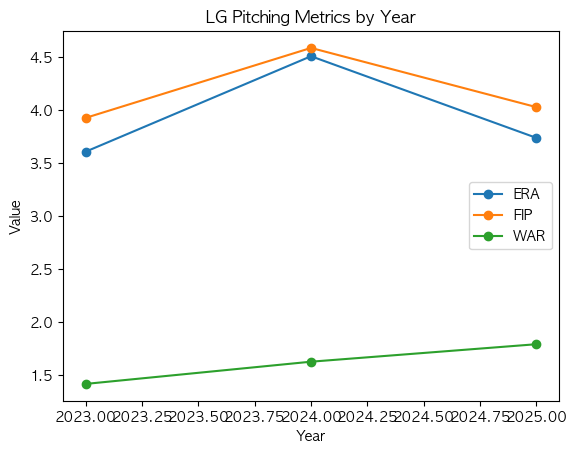

In [94]:
lg_pitch_year.plot(
    marker='o',
    # color=TEAM_COLORS['한화']
)

plt.title('LG Pitching Metrics by Year')
plt.ylabel('Value')
plt.show()


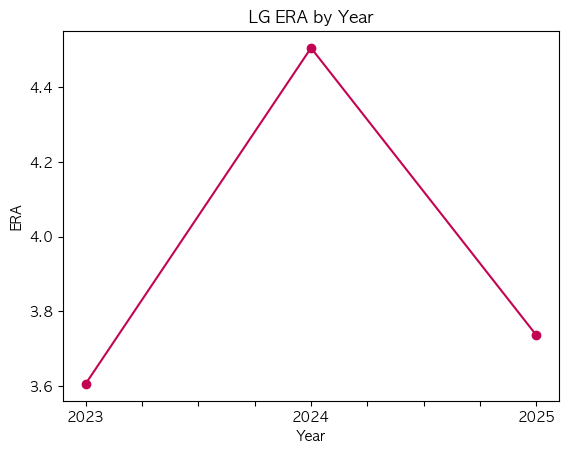

In [95]:
lg_pitch_year.index = lg_pitch_year.index.astype(str)

lg_pitch_year['ERA'].plot(
    marker='o',
    color=TEAM_COLORS['LG']
)

plt.title('LG ERA by Year')
plt.ylabel('ERA')
plt.show()

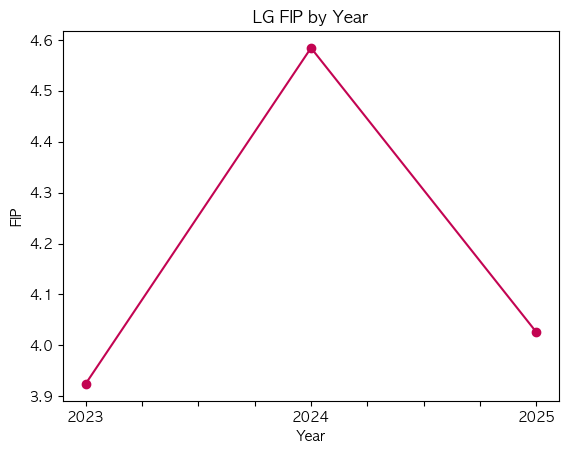

In [96]:
lg_pitch_year.index = lg_pitch_year.index.astype(str)

lg_pitch_year['FIP'].plot(
    marker='o',
    color=TEAM_COLORS['LG']
)

plt.title('LG FIP by Year')
plt.ylabel('FIP')
plt.show()

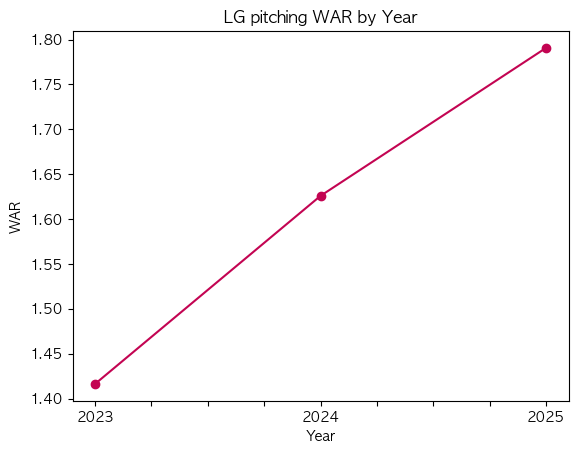

In [97]:
lg_pitch_year.index = lg_pitch_year.index.astype(str)

lg_pitch_year['WAR'].plot(
    marker='o',
    color=TEAM_COLORS['LG']
)

plt.title('LG pitching WAR by Year')
plt.ylabel('WAR')
plt.show()

---
## KIA Batting – Yearly Overview

In [98]:
# KIA 데이터 분리
kia_bat = bat_analysis[bat_analysis['Team'] == 'KIA']
kia_pitch = pitch_analysis[pitch_analysis['Team'] == 'KIA']

In [99]:
kia_bat_year = (
    kia_bat
    .groupby('Year')[bat_cols]
    .mean()
)

kia_bat_year

,OBP,SLG,wRC+,WAR
Year,,,,
2023,0.330316,0.367421,97.126316,1.404211
2024,0.360187,0.429063,105.581250,1.828750
2025,0.318609,0.362261,88.669565,0.930435


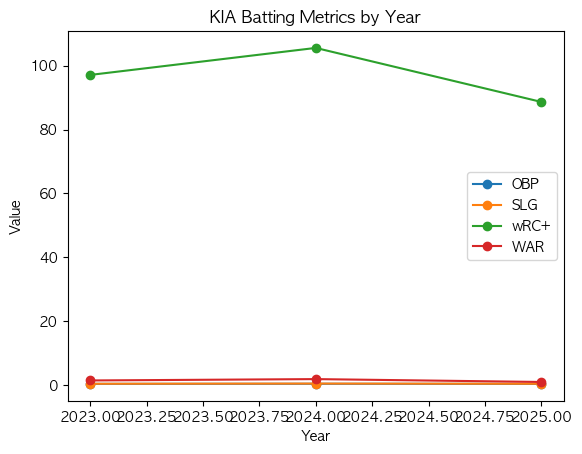

In [100]:
kia_bat_year.plot(
    marker='o',
    # color=TEAM_COLORS['한화']
)

plt.title('KIA Batting Metrics by Year')
plt.ylabel('Value')
plt.show()

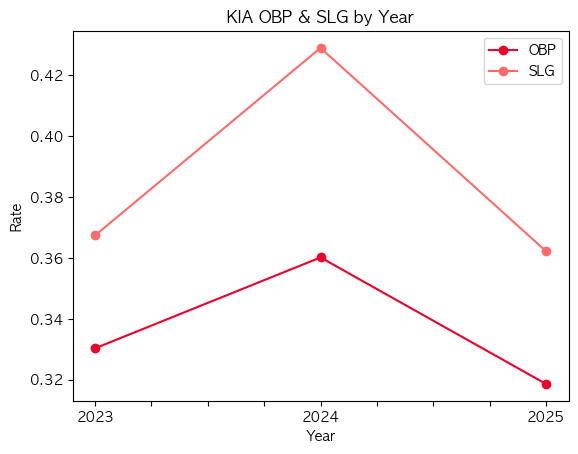

In [101]:
#obp, slg 비교
kia_bat_year.index = kia_bat_year.index.astype(str)

kia_bat_year[['OBP', 'SLG']].plot(
    marker='o',
    color=[TEAM_COLORS['KIA'], '#FF6B6B']
)

plt.title('KIA OBP & SLG by Year')
plt.ylabel('Rate')
plt.show()

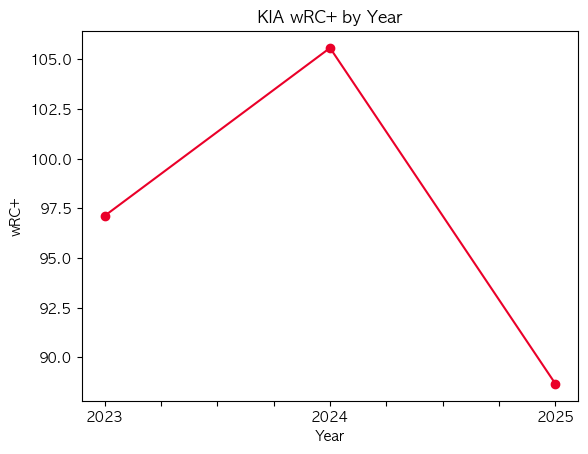

In [102]:
# wRC+ 지표 (공격 생산성 지표)
kia_bat_year.index = kia_bat_year.index.astype(str)

kia_bat_year['wRC+'].plot(
    marker='o',
    color=TEAM_COLORS['KIA']
)

plt.title('KIA wRC+ by Year')
plt.ylabel('wRC+')
plt.show()

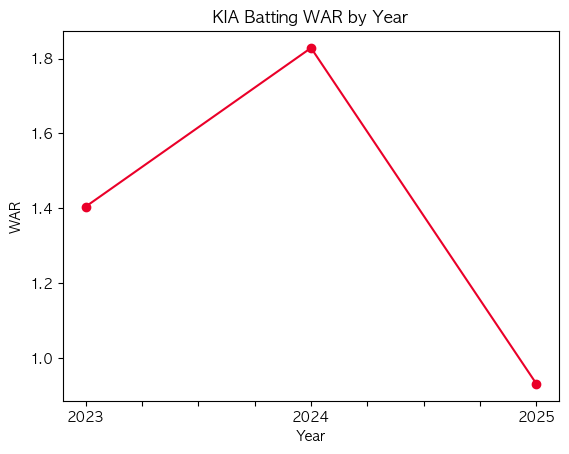

In [103]:
#WAR 지표
kia_bat_year.index = kia_bat_year.index.astype(str)

kia_bat_year['WAR'].plot(
    marker='o',
    color=TEAM_COLORS['KIA']
)

plt.title('KIA Batting WAR by Year')
plt.ylabel('WAR')
plt.show()

## KIA Pitching – Yearly Overview

In [104]:
kia_pitch_year = (
    kia_pitch
    .groupby('Year')[pit_cols]
    .mean()
)

kia_pitch_year

,ERA,FIP,WAR
Year,,,
2023,4.116250,4.420000,1.164375
2024,4.413529,4.735294,1.340588
2025,4.666429,4.432143,1.139286


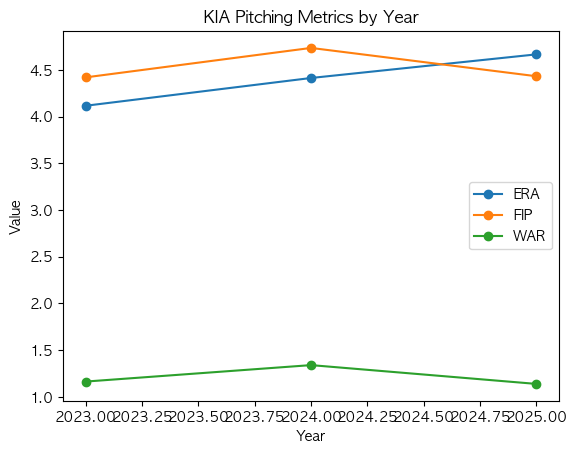

In [105]:
kia_pitch_year.plot(
    marker='o',
    # color=TEAM_COLORS['한화']
)

plt.title('KIA Pitching Metrics by Year')
plt.ylabel('Value')
plt.show()

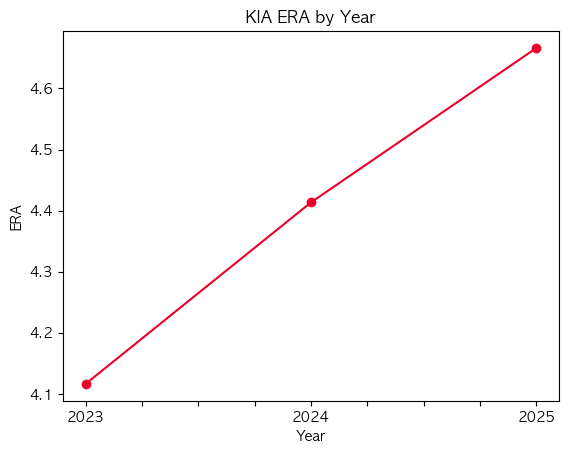

In [106]:
kia_pitch_year.index = kia_pitch_year.index.astype(str)

kia_pitch_year['ERA'].plot(
    marker='o',
    color=TEAM_COLORS['KIA']
)

plt.title('KIA ERA by Year')
plt.ylabel('ERA')
plt.show()

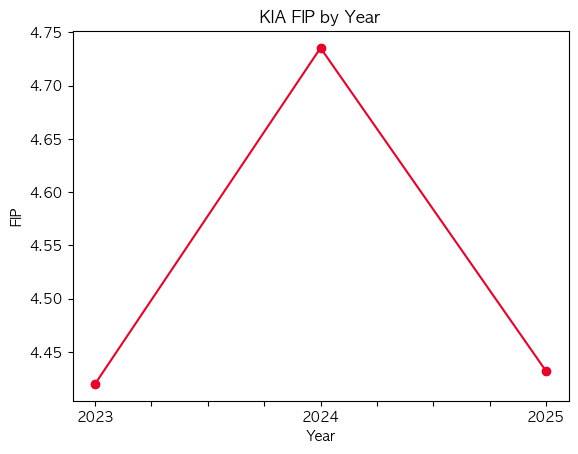

In [107]:
kia_pitch_year.index = kia_pitch_year.index.astype(str)

kia_pitch_year['FIP'].plot(
    marker='o',
    color=TEAM_COLORS['KIA']
)

plt.title('KIA FIP by Year')
plt.ylabel('FIP')
plt.show()

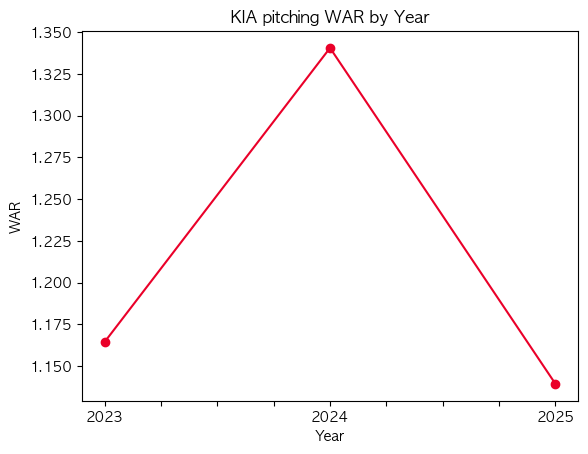

In [108]:
kia_pitch_year.index = kia_pitch_year.index.astype(str)

kia_pitch_year['WAR'].plot(
    marker='o',
    color=TEAM_COLORS['KIA']
)

plt.title('KIA pitching WAR by Year')
plt.ylabel('WAR')
plt.show()

---
## SSG Batting – Yearly Overview

In [109]:
# SSG 데이터 분리
ssg_bat = bat_analysis[bat_analysis['Team'] == 'SSG']
ssg_pitch = pitch_analysis[pitch_analysis['Team'] == 'SSG']

In [110]:
ssg_bat_year = (
    ssg_bat
    .groupby('Year')[bat_cols]
    .mean()
)

ssg_bat_year

,OBP,SLG,wRC+,WAR
Year,,,,
2023,0.326389,0.370556,92.283333,1.294444
2024,0.322706,0.368941,75.335294,0.929412
2025,0.305409,0.351091,75.886364,0.703636


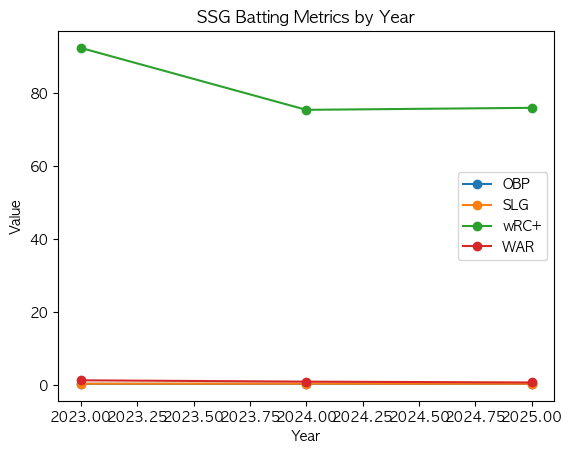

In [111]:
ssg_bat_year.plot(
    marker='o',
    # color=TEAM_COLORS['한화']
)

plt.title('SSG Batting Metrics by Year')
plt.ylabel('Value')
plt.show()

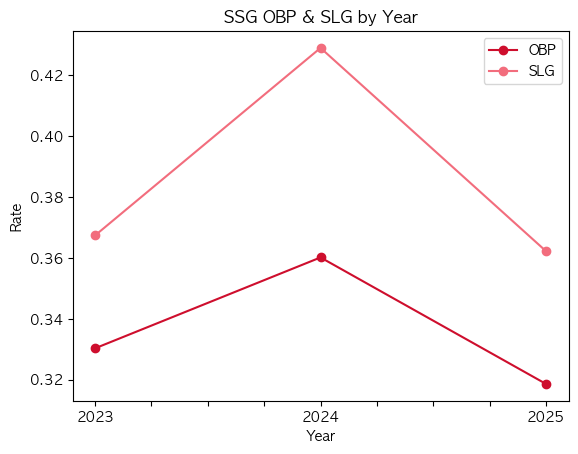

In [112]:
#obp, slg 비교
ssg_bat_year.index = ssg_bat_year.index.astype(str)

kia_bat_year[['OBP', 'SLG']].plot(
    marker='o',
    color=[TEAM_COLORS['SSG'], '#F26D7D']
)

plt.title('SSG OBP & SLG by Year')
plt.ylabel('Rate')
plt.show()

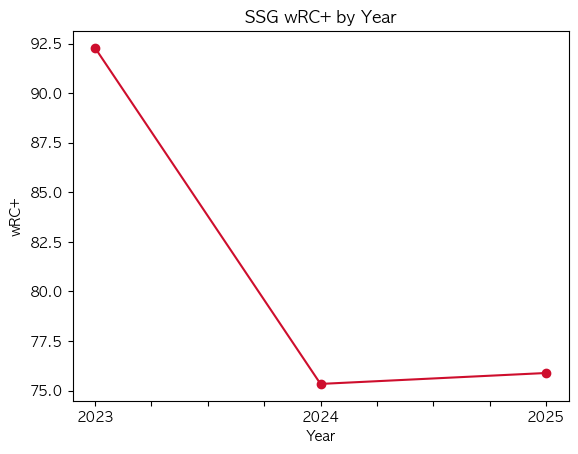

In [113]:
# wRC+ 지표 (공격 생산성 지표)
ssg_bat_year.index = ssg_bat_year.index.astype(str)

ssg_bat_year['wRC+'].plot(
    marker='o',
    color=TEAM_COLORS['SSG']
)

plt.title('SSG wRC+ by Year')
plt.ylabel('wRC+')
plt.show()

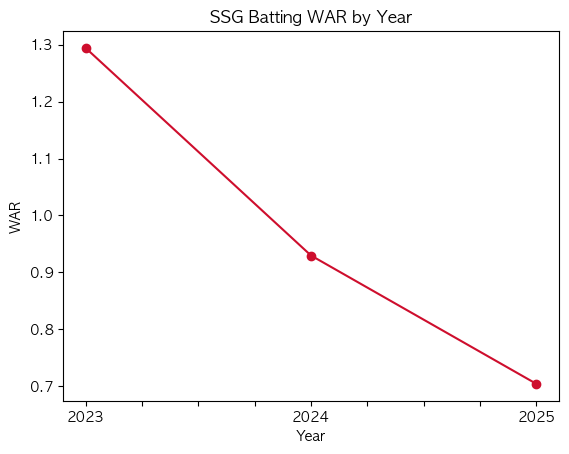

In [114]:
#WAR 지표
ssg_bat_year.index = ssg_bat_year.index.astype(str)

ssg_bat_year['WAR'].plot(
    marker='o',
    color=TEAM_COLORS['SSG']
)

plt.title('SSG Batting WAR by Year')
plt.ylabel('WAR')
plt.show()

## SSG Pitching – Yearly Overview

In [115]:
ssg_pitch_year = (
    ssg_pitch
    .groupby('Year')[pit_cols]
    .mean()
)

ssg_pitch_year

,ERA,FIP,WAR
Year,,,
2023,4.420667,4.523333,1.106000
2024,5.072308,5.059231,1.442308
2025,3.600000,4.075714,2.089286


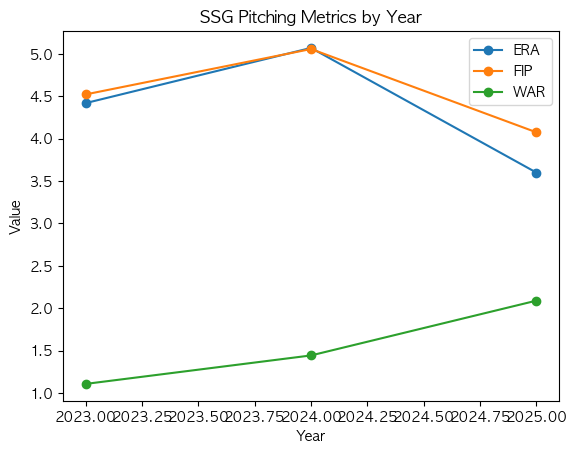

In [116]:
ssg_pitch_year.plot(
    marker='o',
    # color=TEAM_COLORS['한화']
)

plt.title('SSG Pitching Metrics by Year')
plt.ylabel('Value')
plt.show()

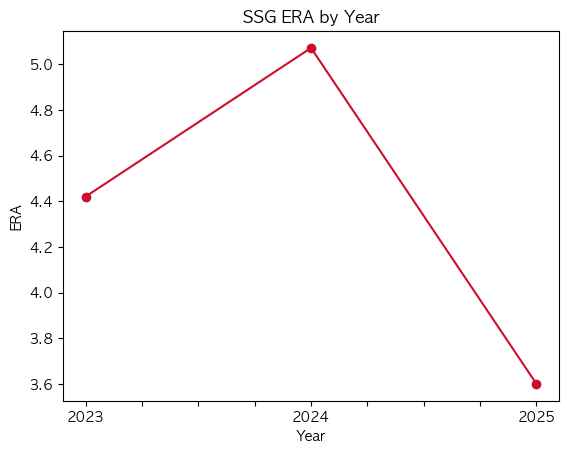

In [117]:
ssg_pitch_year.index = ssg_pitch_year.index.astype(str)

ssg_pitch_year['ERA'].plot(
    marker='o',
    color=TEAM_COLORS['SSG']
)

plt.title('SSG ERA by Year')
plt.ylabel('ERA')
plt.show()

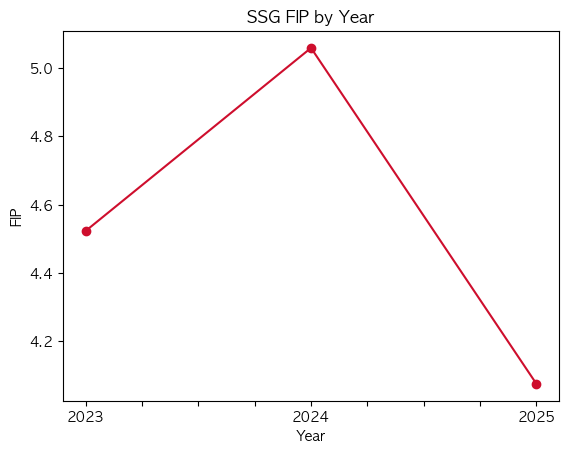

In [118]:
ssg_pitch_year.index = ssg_pitch_year.index.astype(str)

ssg_pitch_year['FIP'].plot(
    marker='o',
    color=TEAM_COLORS['SSG']
)

plt.title('SSG FIP by Year')
plt.ylabel('FIP')
plt.show()

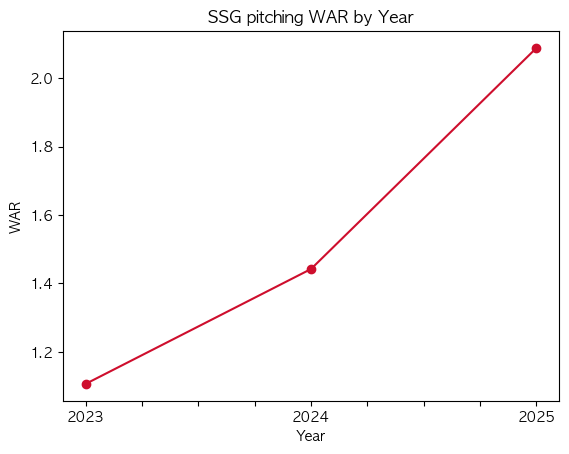

In [119]:
ssg_pitch_year.index = ssg_pitch_year.index.astype(str)

ssg_pitch_year['WAR'].plot(
    marker='o',
    color=TEAM_COLORS['SSG']
)

plt.title('SSG pitching WAR by Year')
plt.ylabel('WAR')
plt.show()

In [139]:
hanwha_bat_test = (
    bat_analysis[bat_analysis['Team'] == '한화']
    .groupby('Year')['R/ePA']
    .mean()
)

hanwha_bat_test


Year
2023    0.084250
2024    0.115810
2025    0.112294
Name: R/ePA, dtype: float64